# Classifying Fashion-MNIST
现在轮到您构建和训练神经网络了。 您将使用Fashion-MNIST数据集[Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist)，它是MNIST数据集的直接替代品。 MNIST实际上对于神经网络来说是trivial的，您可以轻松地获得优于97％的精度。 Fashion-MNIST是一组28x28灰度的衣服图像。 它比MNIST更复杂，因此可以更好地表示网络的实际性能，并且可以更好地表示您将在现实世界中使用的数据集。

<img src='assets/fashion-mnist-sprite.png' width=500px>

在此笔记本中，您将构建自己的神经网络。 虽然在大多数情况下，您可以直接复制并粘贴第3部分中的代码，但这对学习并没有帮助， 对您来说，自己编写代码并使之正常工作很重要。但在遇到困难时请随时查阅以前的笔记本。

## 1. 首先，让我们从 `torchvision` 加载数据集

In [6]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data 定义一个转换以规范化数据
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data 下载并加载训练数据
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data 下载并加载测试数据
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

提取查看其中一张图片one of the images.

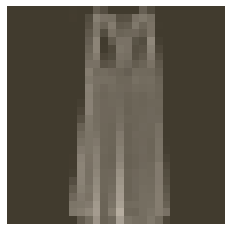

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## 2. Building the network -- 构建神经网络
+ 首先输入图像的尺寸是28x28即784 pixels, 因此输入图像(torch.Size([64, 1, 28, 28]))需要 `flatten` 为(64, 784)
+ 要求输出为 10 classes 
+ 任何网络至少包含1个隐藏层 -- 我决定第一个网络1个隐藏层，随后追加1个2个隐藏层的网络对比来看
+ 这里建议 use **ReLU activations for the layers** and to return the **logits or log-softmax from the forward pass**

[Q1] 需要导入哪些需要的包

In [9]:
import torch
from torch import nn
from torch import optim

In [14]:
import torch
from torch import nn
from torch import optim

input_size = 784
hidden_sizes =[128, 64, 32]
output_size = 10

model2 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(), 
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]), 
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]), 
                      nn.ReLU(), 
                      nn.Linear(hidden_sizes[2], output_size), 
                      nn.LogSoftmax(dim=1))

# nn.Seqiential() 式创建网络 
criterion = nn.NLLLoss()
optimizer = optim.Adam(model2.parameters(), lr=0.003)

epoch = 5
for e in range(epoch):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        log_ps = model2(images)
        loss = criterion(log_ps, labels)
        
        loss.backward()
        
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5270563408986592
Training loss: 0.3949495333471278
Training loss: 0.3580024973638276
Training loss: 0.3350967939204372
Training loss: 0.318219465924415


## 3. Train the network -- 训练神经网络

+ 训练的第一件事是由神经网络的前向输出求出loss -- 定义loss函数>`criterion`[the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`)
+ 求出 loss 后，反向传播计算梯度
+ 定义 `optimizer` 指定优化方法 [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).
+ 收尾：`optimizer.step()` 更新权重

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights
通过调整超参数/hyperparameters(hidden units, learning rate, etc)，你应该可以得到小于0.4的训练损失。

还有循环数据集的方法：
+ 设置 `epoch=` -- 循环几次完整的训练集
 + `for images, labels in trainloader`: 读取1个batch
   + 执行训练步骤

In [10]:
# TODO: Create the network, define the criterion and optimizer
# 网络节点超参数
input_size = 784
hidden_sizes = [128] # 1个代表1层 [128, 64]代表两层
output_size = 10

# nn.Seqiential() 式创建网络 783 - 128 - 10
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], output_size),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

# 开训
epoch = 5
for e in range(epoch):
    running_loss = 0
    for images, labels in trainloader:
        #images = images.view(images[0], -1)
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        logits_output = model(images)
        loss = criterion(logits_output, labels)
        running_loss += loss.item()
        
        loss.backward()
        
        optimizer.step()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.1764744931319628
Training loss: 0.6920630608730988
Training loss: 0.602398525200673
Training loss: 0.5559056330400743
Training loss: 0.5262641670988567


In [14]:
# 2层隐藏层
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model2 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                       nn.ReLU(), 
                       nn.Linear(hidden_sizes[1], output_size), 
                       nn.LogSoftmax(dim=1))
print(model2)
criterion = nn.NLLLoss()
optimizer = optim.SGD(model2.parameters(), lr=0.003)

# 开训
epoch = 8
for e in range(epoch):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        logits_output = model2(images)
        loss = criterion(logits_output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)
Training loss: 1.632553737872699
Training loss: 0.8402596181834431
Training loss: 0.6783987193473621
Training loss: 0.6143283315304754
Training loss: 0.5731558393059509
Training loss: 0.5421200076431862
Training loss: 0.5174704093033317
Training loss: 0.4973071367819426


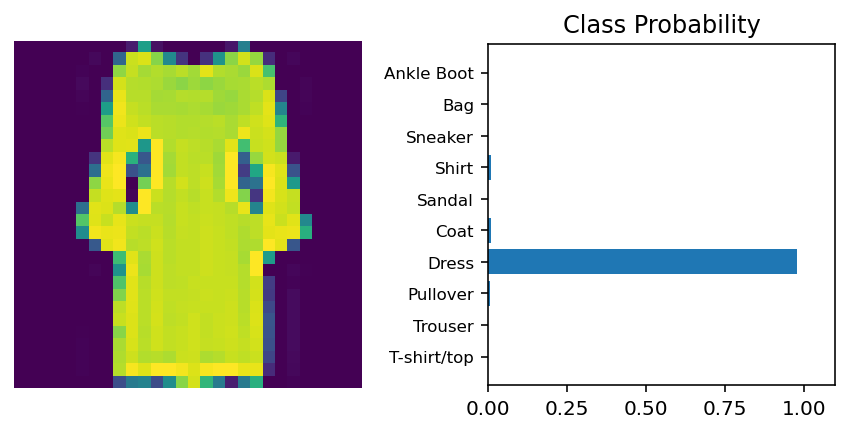

In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)  
images, labels = dataiter.next() # 从测试集取1个images
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
torch.set_grad_enabled(False)
ps = torch.exp(model2(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')